### <center>  PYTHON-13. Визуализация данных ###


<b> Данные студента: </b> Тимур Горбунов

<b> Класс: </b>  DSPR-200

##### <center>  Задание на выполнение: #####

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

``` Python
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
```

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

#### <center>  Ниже будет приведено решение к домашнему заданию: ####

Импорт и подготовка данных:

In [7]:
import pandas as pd 

churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop('RowNumber', axis=1)
display(churn_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


None

Сделаем преобразование определенных столбцов к типу данных category:

In [9]:
cols_to_convert = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited'] # список столбцов, которые мы берём во внимание
for col in churn_data.columns: # цикл по именам столбцов
    if col in cols_to_convert: # проверяем условие
        churn_data[col] = churn_data[col].astype('category') # преобразуем тип столбца
display(churn_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   Surname          10000 non-null  object  
 2   CreditScore      10000 non-null  int64   
 3   Geography        10000 non-null  category
 4   Gender           10000 non-null  category
 5   Age              10000 non-null  int64   
 6   Tenure           10000 non-null  int64   
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  int64   
 9   HasCrCard        10000 non-null  category
 10  IsActiveMember   10000 non-null  category
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  category
dtypes: category(5), float64(2), int64(5), object(1)
memory usage: 674.6+ KB


None

### <center>  Вопрос # 9.1
### <center>  Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению. ###

In [10]:
import matplotlib.pyplot as plt

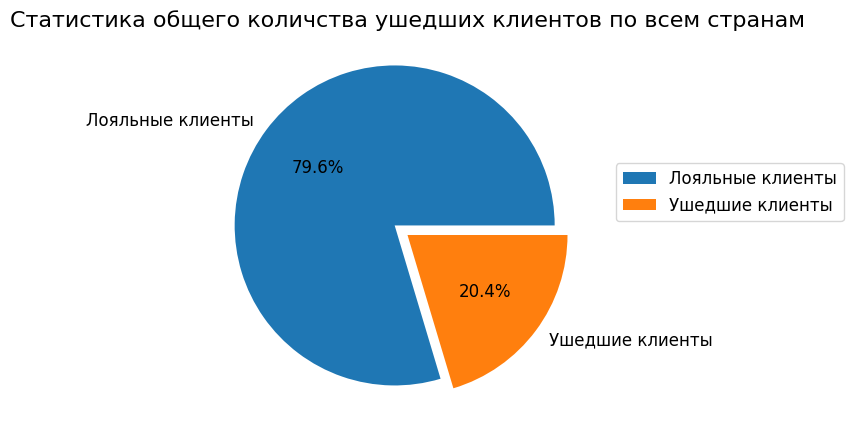

In [392]:
exited_ratio = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_ratio,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%',
    explode=[0.1, 0],
    textprops={'fontsize': 12}
);
axes.set_title('Статистика общего количства ушедших клиентов по всем странам', fontsize=16)
axes.legend(bbox_to_anchor=(1, 0.7), fontsize=12)

Text(0.5, 1.0, 'Статистика клиентов\nпо Германии')

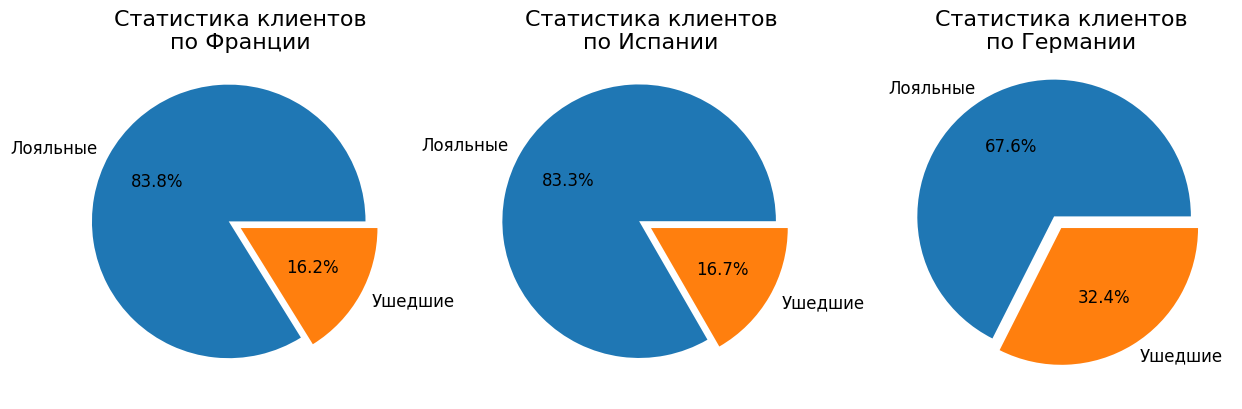

In [393]:
france_data = churn_data[churn_data["Geography"] == "France"]
spain_data = churn_data[churn_data["Geography"] == "Spain"]
germany_data = churn_data[churn_data["Geography"] == "Germany"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

axes[0].pie(
    france_data['Exited'].value_counts(),
    labels=['Лояльные', 'Ушедшие'],
    autopct='%.1f%%',
    explode=[0.1, 0],
    textprops={'fontsize': 12}
)
axes[0].set_title('Статистика клиентов\nпо Франции', fontsize=16)

axes[1].pie(
    spain_data['Exited'].value_counts(),
    labels=['Лояльные', 'Ушедшие'],
    autopct='%.1f%%',
    explode=[0.1, 0],
    textprops={'fontsize': 12}
);
axes[1].set_title('Статистика клиентов\nпо Испании', fontsize=16)

axes[2].pie(
    germany_data['Exited'].value_counts(),
    labels=['Лояльные', 'Ушедшие'],
    autopct='%.1f%%',
    explode=[0.1, 0],
    textprops={'fontsize': 12}
);
axes[2].set_title('Статистика клиентов\nпо Германии', fontsize=16)


#### Вывод: ####
- Средний отток клиентов у банка по всем странам составляет 20.4 %
- Наибольший отток наюлбюдается в Германии и составляет 32.4%

### <center>  Вопрос # 9.2
### <center>  Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы. ###

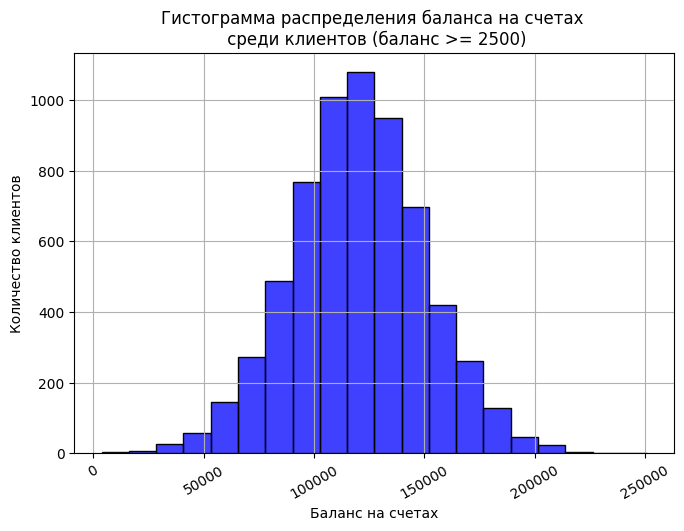

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt

balance_criteria = churn_data[churn_data['Balance'] > 2500]
#balance_criteria['Balance'].describe()

fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0, 0, 1, 1])
sns.histplot(
    x=balance_criteria['Balance'],
    color='blue', bins=20,
    ax=axes
)
axes.grid()
axes.set_xlabel('Баланс на счетах')
axes.set_ylabel('Количество клиентов')
axes.set_title('Гистограмма распределения баланса на счетах \n среди клиентов (баланс >= 2500)')
axes.xaxis.set_tick_params(rotation=30)

#### Вывод: ####
- Выше приведен график распределения баланса 'Balance' у клиентов банка (c балансом свыше 2500).
- Гистограмма указывает что чаще всего клиенты хранят на счетах порядка 115-125 тыс. денег (тип валюты в задании не указан)

### <center> Вопрос # 9.3
### <center> Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке. ###

C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_9448\2649265142.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



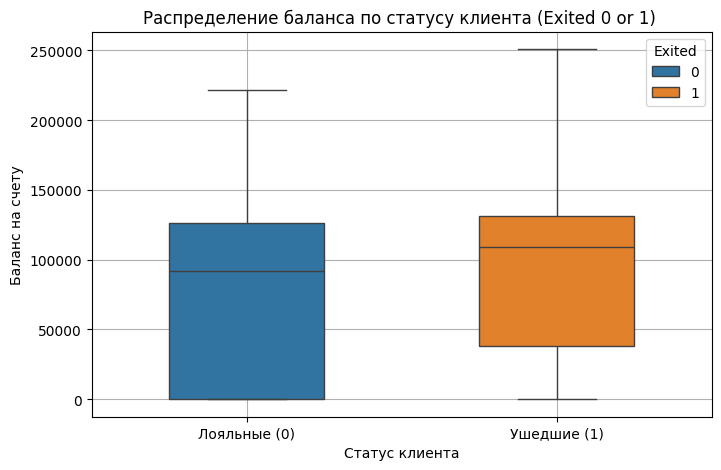

In [395]:
import seaborn as sns
fig = plt.figure(figsize=(8, 5))
boxplot = sns.boxplot(
    data=churn_data,
    x='Exited',
    y='Balance',
    orient='v',
    width=0.5,
    hue='Exited'
)
boxplot.set_xticklabels(['Лояльные (0)', 'Ушедшие (1)'])
boxplot.set_xlabel('Статус клиента')
boxplot.set_ylabel('Баланс на счету')
boxplot.set_title('Распределение баланса по статусу клиента (Exited 0 or 1) ')
boxplot.grid()


In [396]:
# Вывод статистики
display(churn_data.groupby('Exited')['Balance'].describe())

C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_9448\4012840231.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,72745.296779,62848.040701,0.0,0.00,92072.68,126410.28,221532.80
1,2037.0,91108.539337,58360.794816,0.0,38340.02,109349.29,131433.33,250898.09


#### Вывод: ####
- Медиана и среднее значение баланса у "ушедших" клиентов выше, чем у "лояльных".
- Средний баланс ушедших клиентов: 91,108.54
- Средний баланс лояльных клиентов: 72,745.30

Предположение: Клиенты с большими остатками на счету уходят чаще, возможно, их не устраивают условия обслуживания. Банку необходимо обратить внимание на эту катерогию клиентов.

### <center>  Вопрос # 9.4
### <center>  Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку? ###

C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_9448\1953394384.py:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



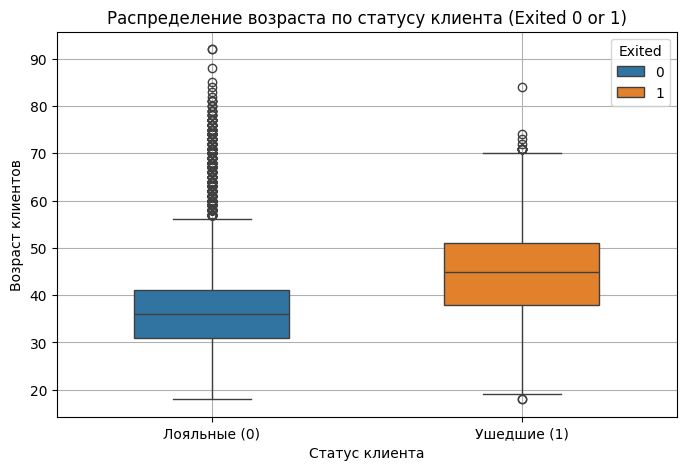

In [397]:
fig = plt.figure(figsize=(8, 5))
box_plot_age = sns.boxplot(
    data=churn_data,
    x='Exited',
    y='Age',
    orient='v',
    width=0.5,
    hue='Exited'
)
box_plot_age.set_xticklabels(['Лояльные (0)', 'Ушедшие (1)'])
box_plot_age.set_xlabel('Статус клиента')
box_plot_age.set_ylabel('Возраст клиентов')
box_plot_age.set_title('Распределение возраста по статусу клиента (Exited 0 or 1)')
box_plot_age.grid()

#### Вывод: ####
- На boxplot видно, что у ушедших клиентов (Exited=1) медиана возраста выше, чем у лояльных.
- В группе "лояльных" клиентов больше потенциальных выбросов, особенно среди клиентов старше 60 лет.

Предположение: Банку стоит обратить внимание на возрастную категорию 40+, так как среди них выше доля оттока и больше выбросов. Возможно, этих клиентов не устраивают условия обслуживания.

### <center>  Вопрос # 9.5
### <center>  Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

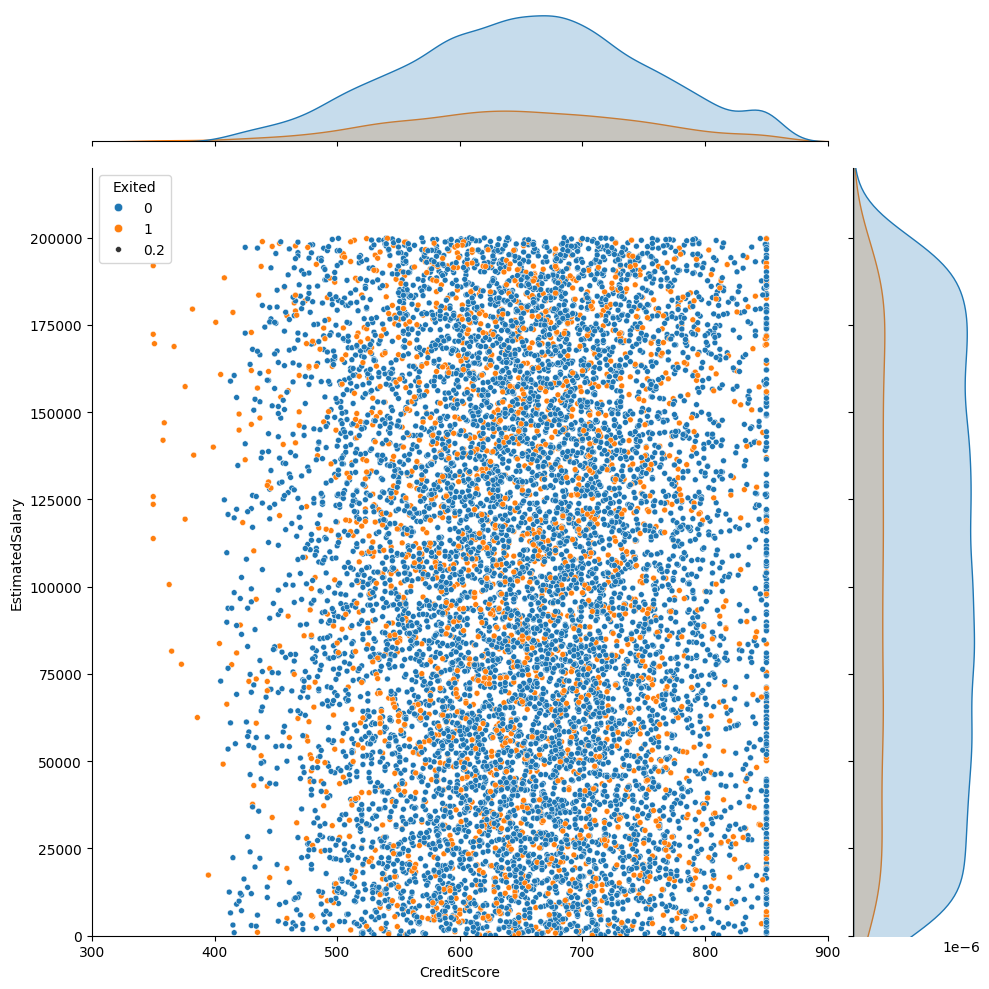

In [398]:
credit_salary_plot = sns.jointplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
    xlim=(300, 900),
    ylim=(0, 220000),
    height=10,
    size = 0.2
)

#### Вывод: ####
- Была построена диаграмма рассеяния "Кредитная история" vs. "Предполагаемая заработная плата".
- Явных закономерностей выявлено не было
- Добавлена расцветка по признаку оттока Exited Yes(1) & No(0)
- Явных закономерностей выявлено не было
- График был отформатирован по шкале X & Y, также уменьшен размер точек для лучшего контраста. Но закономерностей выявлено не было.

### <center>  Вопрос # 9.6
### <center>  Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это. ###

C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_9448\1509929879.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



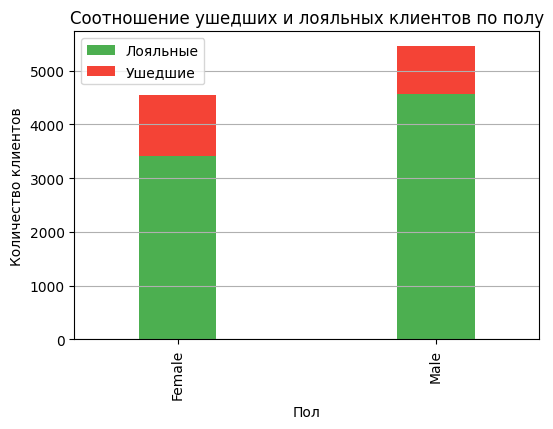

In [399]:
# Группируем по полу и признаку оттока, затем строим столбчатую диаграмму
gender_exited_counts = churn_data.groupby(['Gender', 'Exited']).size().unstack()
gender_exited_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(6, 4),
    width = 0.3,
    color=['#4CAF50', '#F44336']
)
plt.title('Соотношение ушедших и лояльных клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.legend(['Лояльные', 'Ушедшие'])
plt.grid(axis='y')

Text(0.5, 1.0, 'Статистика по Женскому полу')

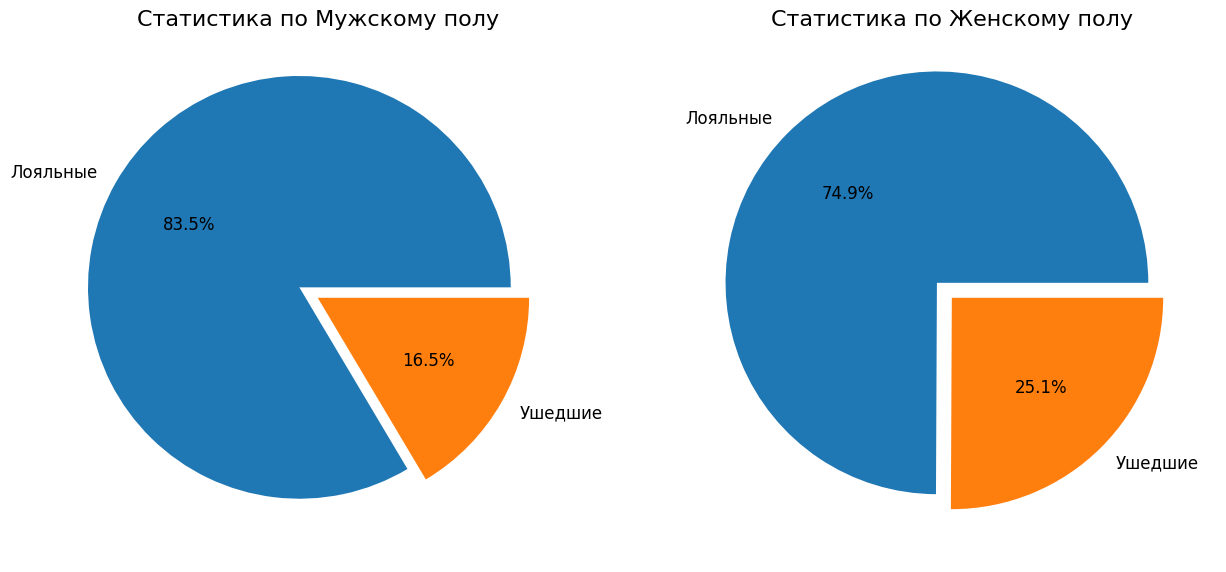

In [400]:
male_data = churn_data[churn_data["Gender"] == "Male"]
female_data = churn_data[churn_data["Gender"] == "Female"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))


axes[0].pie(
    male_data['Exited'].value_counts(),
    labels=['Лояльные', 'Ушедшие'],
    autopct='%.1f%%',
    explode=[0.1, 0],
    textprops={'fontsize': 12}
)
axes[0].set_title('Статистика по Мужскому полу', fontsize=16)

axes[1].pie(
    female_data['Exited'].value_counts(),
    labels=['Лояльные', 'Ушедшие'],
    autopct='%.1f%%',
    explode=[0.1, 0],
    textprops={'fontsize': 12}
);
axes[1].set_title('Статистика по Женскому полу', fontsize=16)

#### Вывод: ####
- Большая часть клиентов банка мужского пола (5457 человек), клиенты женского пола (4543 человек)
- Отток среди клиентов больше среди женского пола и составляет 25.1% против 16.5% у мужского пола

### <center>  Вопрос # 9.7
### <center>  Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму. ###

C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_9448\1818365339.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



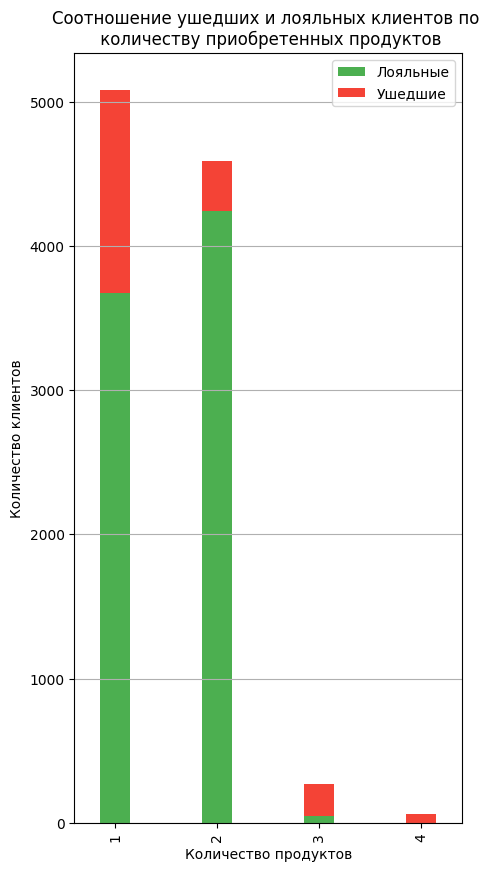

In [401]:
# Группируем по количеству продуктов и признаку оттока, затем строим столбчатую диаграмму
exited_counts_per_product = churn_data.groupby(['NumOfProducts', 'Exited']).size().unstack()
exited_counts_per_product.plot(
    kind='bar',
    stacked=True,
    figsize=(5, 10),
    width = 0.3,
    color=['#4CAF50', '#F44336']
)
plt.title('Соотношение ушедших и лояльных клиентов по \n количеству приобретенных продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество клиентов')
plt.legend(['Лояльные', 'Ушедшие'])
plt.grid(axis='y')

#### Вывод: ####
- Большинство клиентов банка приобретали не более 2-х продуктов
- Клиенты приобретавшие 3 или 4 банковских продукта имеют наибольший отток "Exited"  в процентном соотношении

Предположение: клиенты активно приобретающие банковские услуги остались не довольны условиями и решили сменить банк.

### <center>  Вопрос # 9.8
### <center>  Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

заметка для ментора: я не совсем понимаю условие по которому клиент приписывает к статусу "Активного" клиента, в условиях задачи это не было определено:

<i> IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет) </i>

ввиду отсутствия доп. информации, я предполагаю что клиент приписывается к "активным" если совершает регулярные банковские операции с определенной частотой


C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_9448\748085375.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



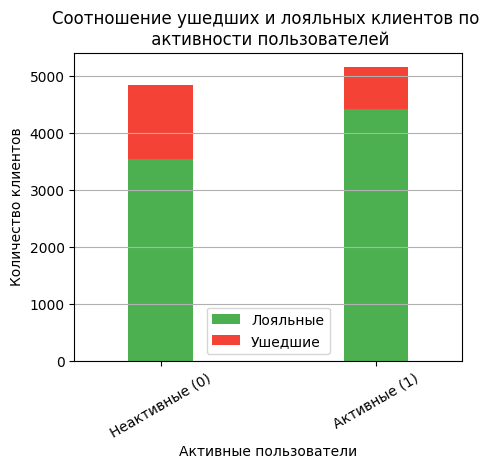

In [402]:
# Группируем по статусу активности и признаку оттока, затем строим столбчатую диаграмму
exited_counts_active_stat = churn_data.groupby(['IsActiveMember', 'Exited']).size().unstack()
exited_counts_active_stat.plot(
    kind='bar',
    stacked=True,
    figsize=(5, 4),
    width = 0.3,
    color=['#4CAF50', '#F44336']
)
plt.title('Соотношение ушедших и лояльных клиентов по \n активности пользователей')
plt.xticks(ticks=[0, 1], labels=['Неактивные (0)', 'Активные (1)'])
plt.xlabel('Активные пользователи')
plt.ylabel('Количество клиентов')
plt.legend(['Лояльные', 'Ушедшие'])
plt.xticks(rotation=30)
plt.grid(axis='y')

#### Вывод: ####
- Отток клиентов среди "Неактивных" клиентов выше и составляет ~26.9%
- Отток клиентов среди "Активных" клиентов ниже и составляет ~14.3%

Предположение: если под "активностью" подразумевается частота(регулярность) банковских операций пользователя (клиента). В этом случае рекомендую банку предоставить более широкий спектр возможностей для клиентов банка. Такие как: удобные мобильные приложения, способы оплаты и другие полезные "плюшки" для пользователей с целью повышения их активности.

С другой стороны "Неактивные" пользователи могут быть долгосрочными вкладчиками с гораздо большими суммами вклада (Вопрос#9.3 Баланс vs. Отток) и заинтересованы в более выгодных условиях для вкладов. Одновременно эта категория клиентом может и не являться "Активными" ввиду малого количества операций по банковскому счету т.к. используют депозиты.

### <center>  Вопрос # 9.9
### <center>  В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

В задании #9.1 я уже выяснил что доля ушедших клиентов (в %) выше в Германии.
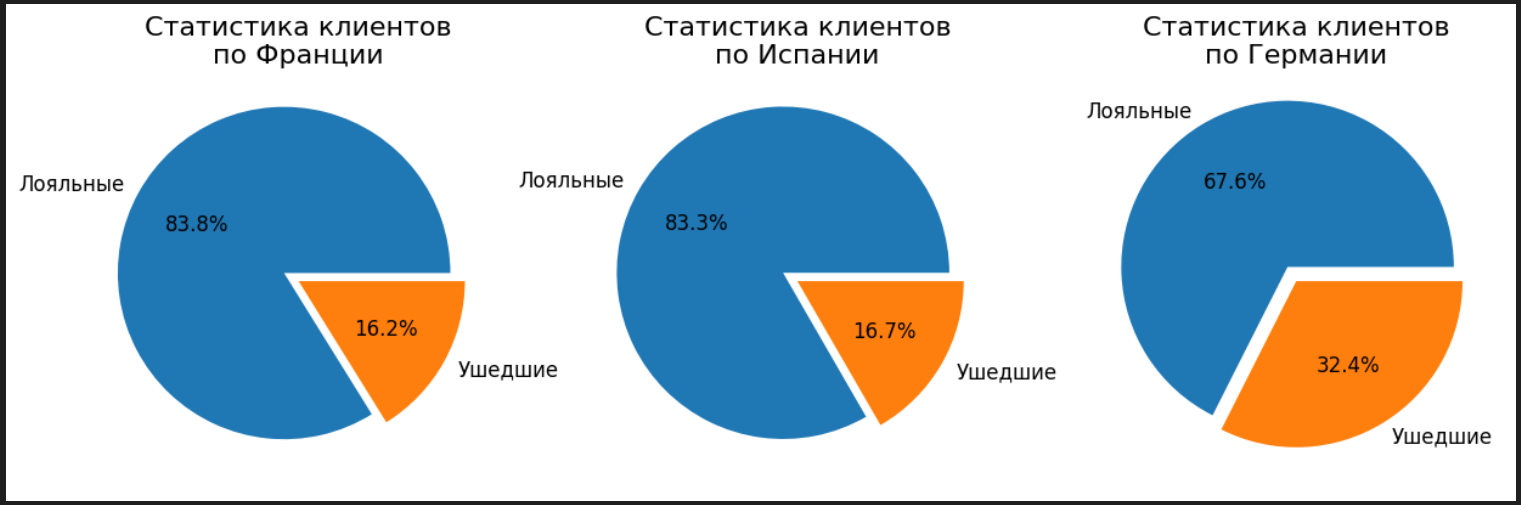
Ниже составлена тепловая карта:

In [403]:
import plotly.express as px

# Считаем общее количество клиентов по странам
total_by_country = churn_data.groupby("Geography").size().reset_index(name="TotalCount")
# Считаем количество ушедших клиентов по странам
exited_by_country = churn_data[churn_data["Exited"] == 1].groupby("Geography").size().reset_index(name="ExitedCount")
# Объединяем таблицы
country_churn = total_by_country.merge(exited_by_country, on="Geography", how="left")
country_churn["ExitedCount"] = country_churn["ExitedCount"].fillna(0)
# Считаем долю ушедших
country_churn["ExitedShare"] = country_churn["ExitedCount"] / country_churn["TotalCount"]

# Строим тепловую карту по доле ушедших
fig = px.choropleth(
    data_frame=country_churn,
    locations="Geography",
    locationmode="country names",
    color="ExitedShare",
    range_color=[0, country_churn["ExitedShare"].max()],
    title='Доля ушедших клиентов по странам',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)

fig.show()

C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_9448\3224513467.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_9448\3224513467.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



- По тепловой карте, наибольший отток клиентов (в долях) наблюдается в Германии

Вторая часть вопроса: <i> Предположите, с чем это может быть связано </i>

In [404]:
france_data = churn_data[churn_data['Geography'] == 'France']
france_data['Balance'].describe()

count      5014.000000
mean      62092.636516
std       64133.565524
min           0.000000
25%           0.000000
50%       62153.500000
75%      121444.877500
max      238387.560000
Name: Balance, dtype: float64

In [405]:
spain_data = churn_data[churn_data['Geography'] == 'Spain']
spain_data['Balance'].describe()

count      2477.000000
mean      61818.147763
std       64235.555208
min           0.000000
25%           0.000000
50%       61710.440000
75%      121056.630000
max      250898.090000
Name: Balance, dtype: float64

In [406]:
germany_data = churn_data[churn_data['Geography'] == 'Germany']
germany_data['Balance'].describe()

count      2509.000000
mean     119730.116134
std       27022.006157
min       27288.430000
25%      102800.720000
50%      119703.100000
75%      137560.380000
max      214346.960000
Name: Balance, dtype: float64

C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_9448\3963419622.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_9448\3963419622.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_9448\3963419622.py:45: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



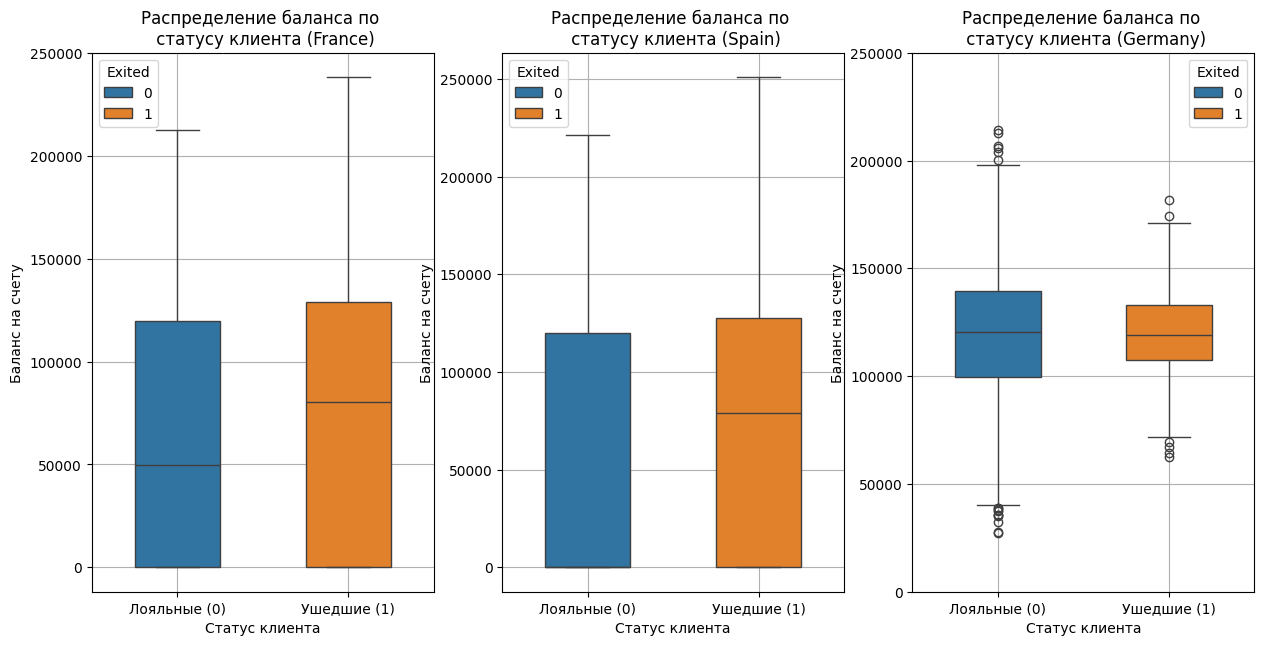

In [407]:
# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

axes[0]=sns.boxplot(
    data=france_data,
    x='Exited',
    y='Balance',
    orient='v',
    width=0.5,
    hue='Exited',
    ax=axes[0]
)
axes[0].set_xticklabels(['Лояльные (0)', 'Ушедшие (1)'])
axes[0].set_xlabel('Статус клиента')
axes[0].set_ylabel('Баланс на счету')
axes[0].set_title('Распределение баланса по \n статусу клиента (France)')
#axes[0].set(ylim=(0, 250000))
axes[0].grid()

axes[0]=sns.boxplot(
    data=spain_data,
    x='Exited',
    y='Balance',
    orient='v',
    width=0.5,
    hue='Exited',
    ax=axes[1]
)
axes[1].set_xticklabels(['Лояльные (0)', 'Ушедшие (1)'])
axes[1].set_xlabel('Статус клиента')
axes[1].set_ylabel('Баланс на счету')
axes[1].set_title('Распределение баланса по \n статусу клиента (Spain)')
#axes[1].set(ylim=(0, 250000))
axes[1].grid()

axes[0]=sns.boxplot(
    data=germany_data,
    x='Exited',
    y='Balance',
    orient='v',
    width=0.5,
    hue='Exited',
    ax=axes[2]
)
axes[2].set_xticklabels(['Лояльные (0)', 'Ушедшие (1)'])
axes[2].set_xlabel('Статус клиента')
axes[2].set_ylabel('Баланс на счету')
axes[2].set_title('Распределение баланса по \n статусу клиента (Germany)')
axes[2].set(ylim=(0, 250000))
axes[2].grid()

#### Вывод: ####
- По тепловой карте, наибольший отток клиентов наблюдается в Германии
- По второй диаграмме, я произвел сравнение по вкладам в разных странах (box plot). Мы можем увидеть что: Медиана и среднее значение баланса у клиентов в Германии выше, чем во Франции и Испании.

Предположение: клиенты в Германии заинтересованы в лучших условиях по вкладам из-за большего размера накоплений (вкладов)

### <center>  Вопрос # 9.10
### <center>  Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [408]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
display(churn_data['CreditScoreCat'])

0            Fair
1            Fair
2            Poor
3            Good
4       Excellent
          ...    
9995         Good
9996         Poor
9997         Good
9998         Good
9999    Excellent
Name: CreditScoreCat, Length: 10000, dtype: object

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


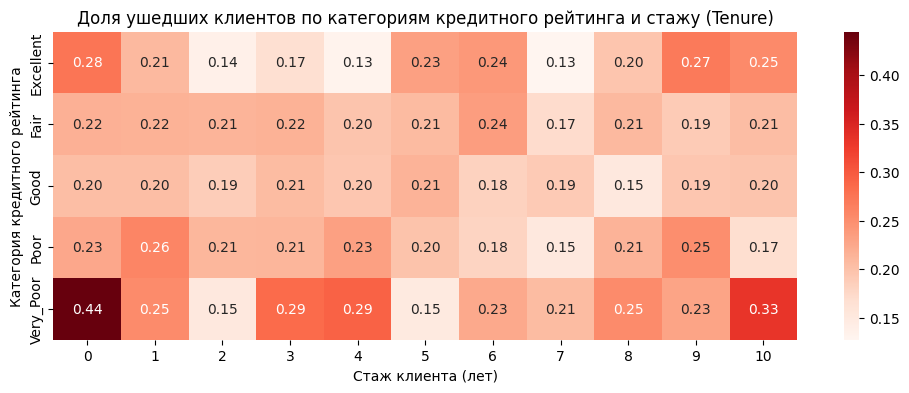

In [409]:
# Преобразуем Exited в int для корректного вычисления среднего
churn_data['Exited_int'] = churn_data['Exited'].astype(int)
pivot_table = churn_data.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited_int',
    aggfunc='mean'
)

display(pivot_table)

plt.figure(figsize=(12, 4))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".2f",
    cmap="Reds"
)
plt.title('Доля ушедших клиентов по категориям кредитного рейтинга и стажу (Tenure)')
plt.ylabel('Категория кредитного рейтинга')
plt.xlabel('Стаж клиента (лет)')
plt.show()


#### Вывод: ####
- По тепловой карте, наибольший отток клиентов наблюдается у категории клиентов с низким кредитным рейтингом <b> Very_Poor </b> , особенно ярко выражено для клиентов банка которые пользовались услугами менее одного года <b> Tenure < 1 </b> 

- Вторая группа риска, это клиенты со стажем <b> Tenure 10 лет </b>  c кредитным статусом <b> Very_Poor </b> 

- Третья группа риска, это клиенты со стажем <b> Tenure 3-4 года </b>  c кредитным статусом <b> Very_Poor </b> 
